# House Price Prediction

## EDA 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sns.set(rc={"figure.figsize":(16, 9)})

In [4]:
df_train = pd.read_csv("data/train.csv")

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Examining the dependent variable `SalePrice` 

In [8]:
df_train.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [9]:
df_train.SalePrice.tail()

1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64

In [10]:
df_train.SalePrice.isna().sum()

0

In [11]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We got 1460 sale prices with a mean of roughly `181K` and a median of `163K`. It is positively skewed. The maximum value is `755K` and the minimum value is `35K`. With a σ of `79K` the values are fairly volatile. Lower and upper percentile are `130K` and `755K` respectively.

In [12]:
df_train.SalePrice.nunique()

663

In [13]:
df_train.SalePrice.value_counts()[:20]

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
Name: SalePrice, dtype: int64

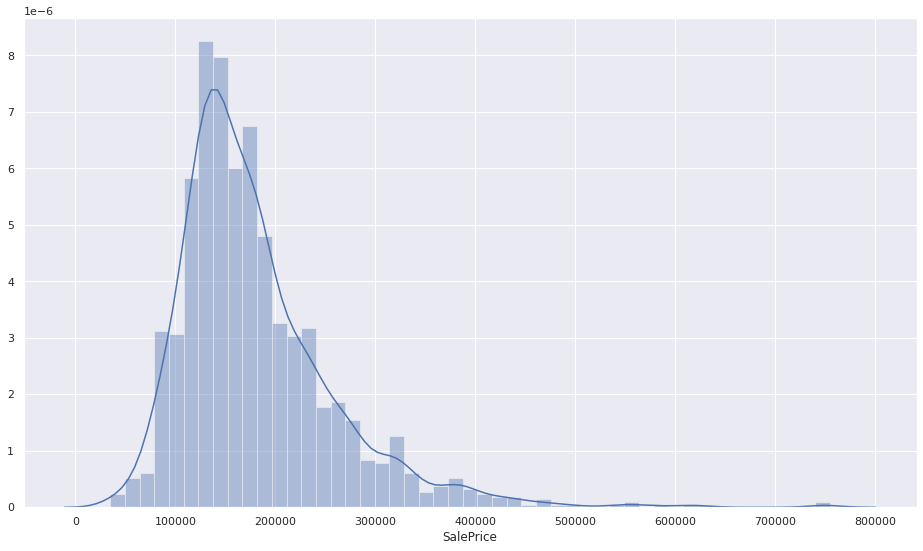

In [14]:
sns.distplot(df_train.SalePrice)

In [15]:
print(f'Skewness of SalePrice: {df_train.SalePrice.skew()}')
print(f'Kurtosis of SalePrice: {df_train.SalePrice.kurt()}')

Skewness of SalePrice: 1.8828757597682129
Kurtosis of SalePrice: 6.536281860064529


Positively skewed and leptokurtic

### Visualising the housing attributes

In [41]:
def create_plot(input_var: str, plot_type: str = 'scatter'):
    data = pd.concat([df_train.SalePrice, df_train[input_var]], axis = 1)
    if plot_type == 'scatter':
        data.plot.scatter(x=input_var, y='SalePrice', c='b')
    elif plot_type == 'boxplot':
        fig = sns.boxplot(x=input_var, y="SalePrice", data=data)

#### GrLivArea

Above grade (ground) living area square feet

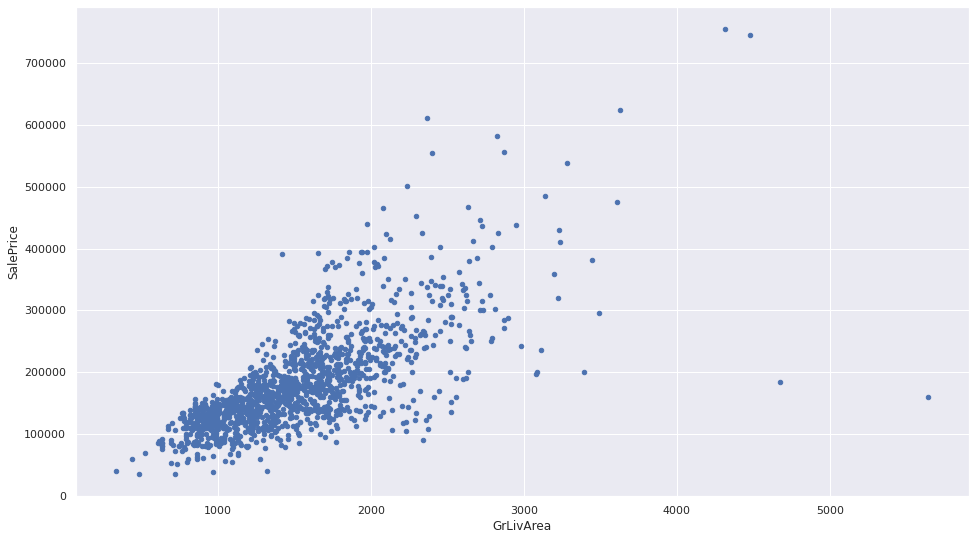

In [42]:
create_plot('GrLivArea')

#### TotalBsmtSF

Total square feet of basement area

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


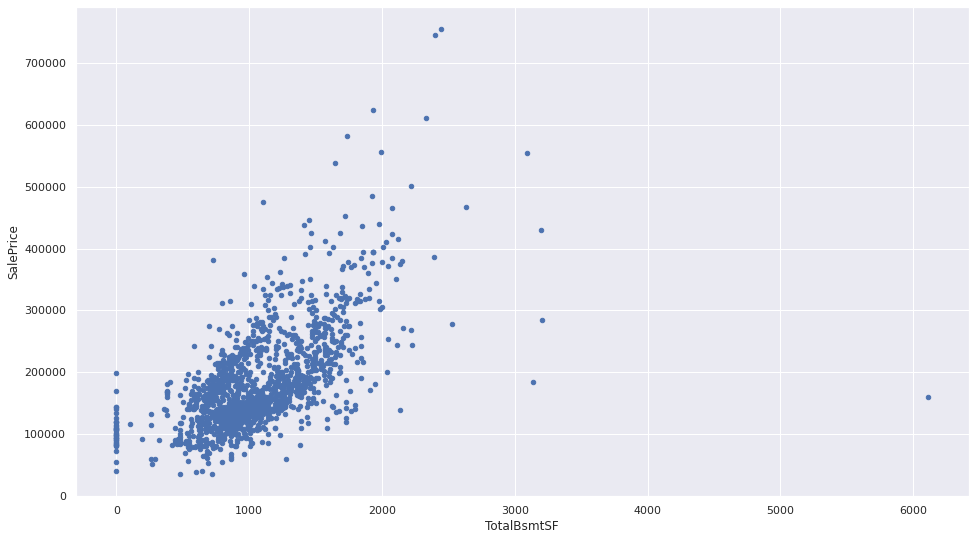

In [18]:
create_plot('TotalBsmtSF')

#### MSSubClass 

Identifies the type of dwelling involved in the sale.

- 20	1-STORY 1946 & NEWER ALL STYLES
- 30	1-STORY 1945 & OLDER
- 40	1-STORY W/FINISHED ATTIC ALL AGES
- 45	1-1/2 STORY - UNFINISHED ALL AGES
- 50	1-1/2 STORY FINISHED ALL AGES
- 60	2-STORY 1946 & NEWER
- 70	2-STORY 1945 & OLDER
- 75	2-1/2 STORY ALL AGES
- 80	SPLIT OR MULTI-LEVEL
- 85	SPLIT FOYER
- 90	DUPLEX - ALL STYLES AND AGES
- 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150	1-1/2 STORY PUD - ALL AGES
- 160	2-STORY PUD - 1946 & NEWER
- 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190	2 FAMILY CONVERSION - ALL STYLES AND AGES

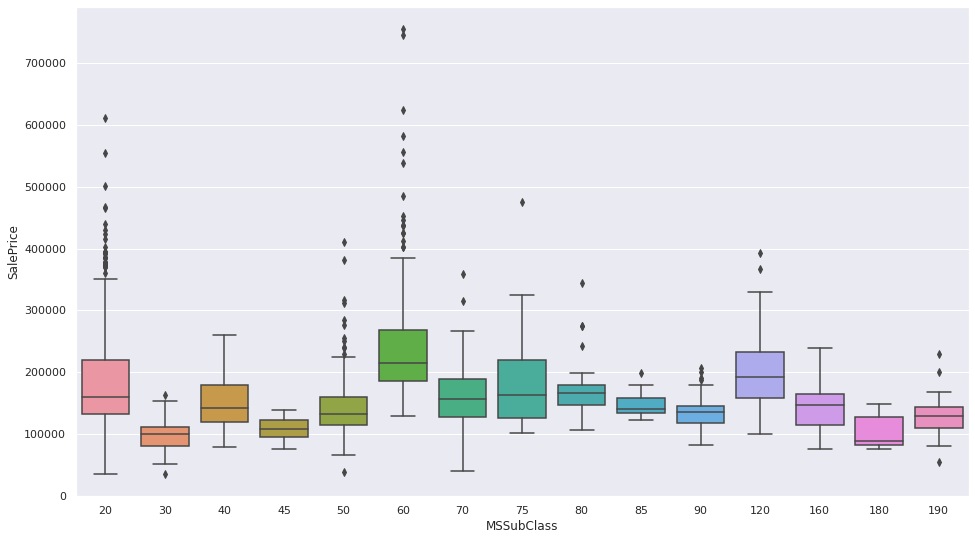

In [19]:
create_plot('MSSubClass', 'boxplot')

In [20]:
df_train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

#### MSZoning

Identifies the general zoning classification of the sale.

- A:	Agriculture
- C:	Commercial
- FV:	Floating Village Residential
- I:	Industrial
- RH:	Residential High Density
- RL:	Residential Low Density
- RP:	Residential Low Density Park 
- RM:	Residential Medium Density

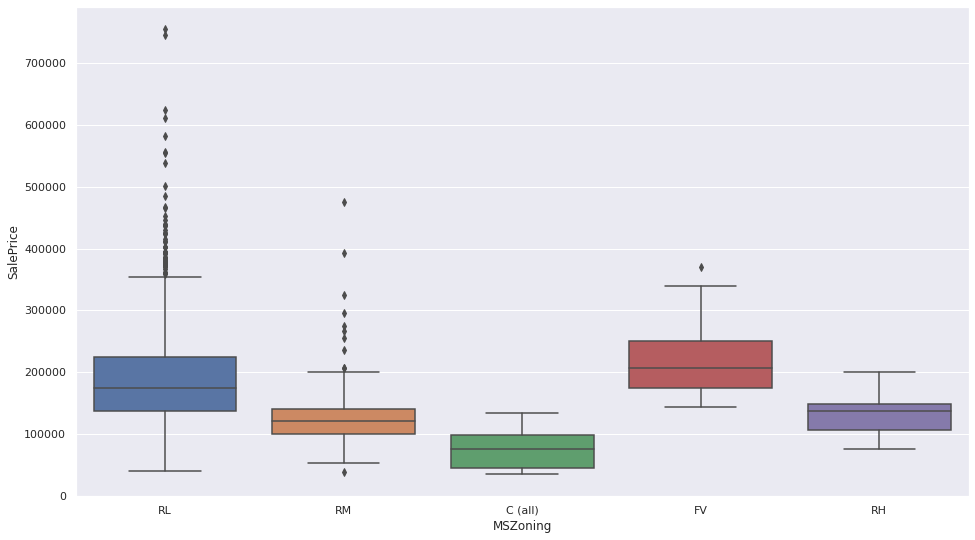

In [21]:
create_plot('MSZoning', 'boxplot')

In [22]:
df_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

#### LotFrontage 

Linear feet of street connected to property

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


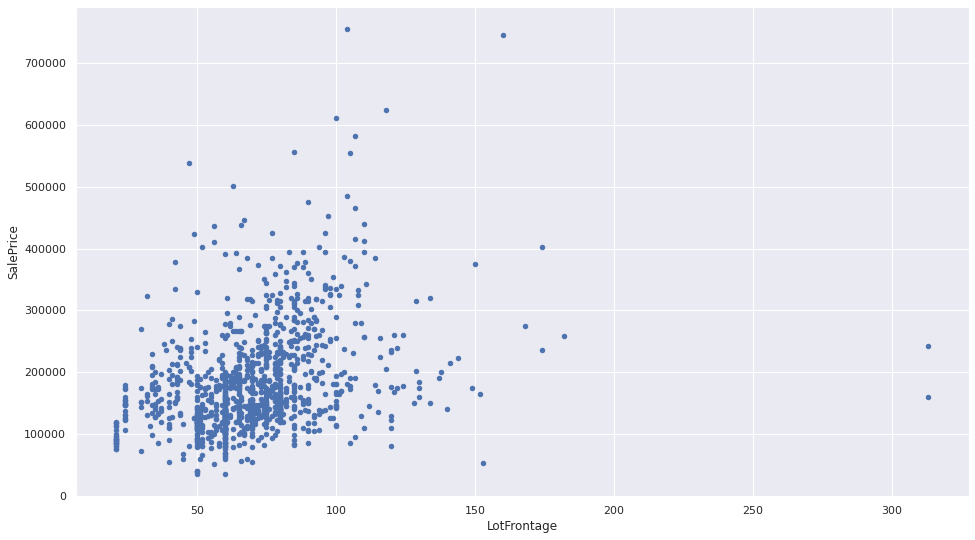

In [23]:
create_plot('LotFrontage')

#### LotArea 

Lot size in square feet

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


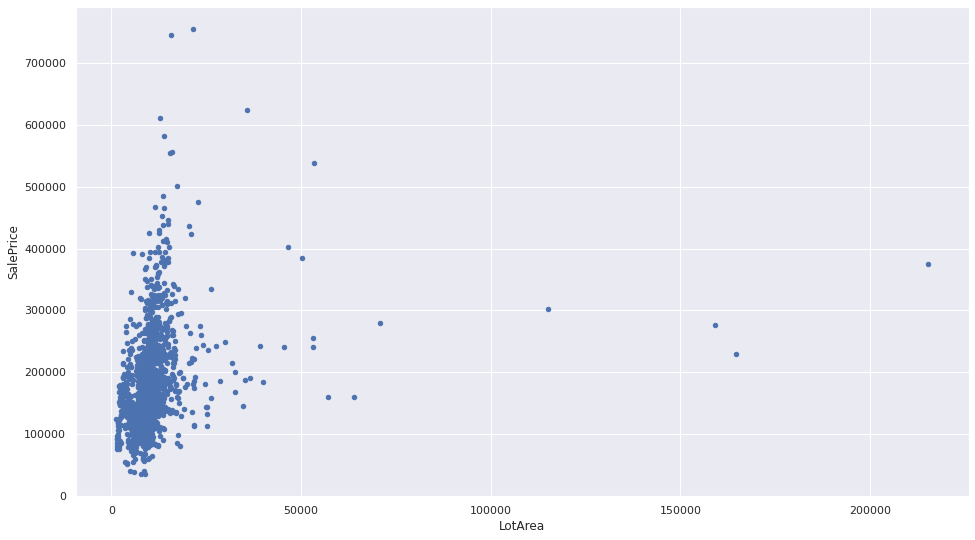

In [24]:
create_plot('LotArea')

#### Street 

Type of road access to property:
- Grvl:	Gravel	
- Pave:	Paved

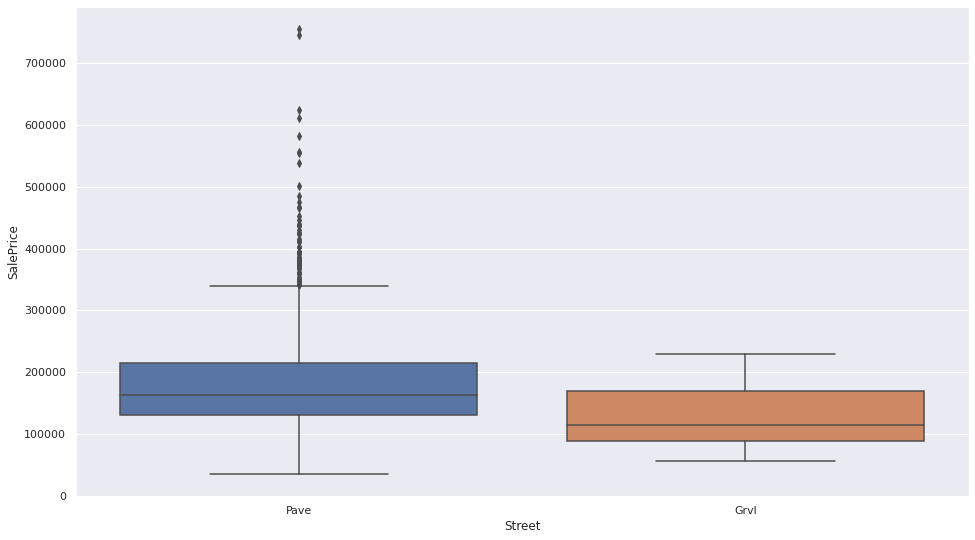

In [25]:
create_plot('Street', 'boxplot')

#### Alley

Type of alley access to property:
- Grvl:	Gravel
- Pave:	Paved
- NA: 	No alley access

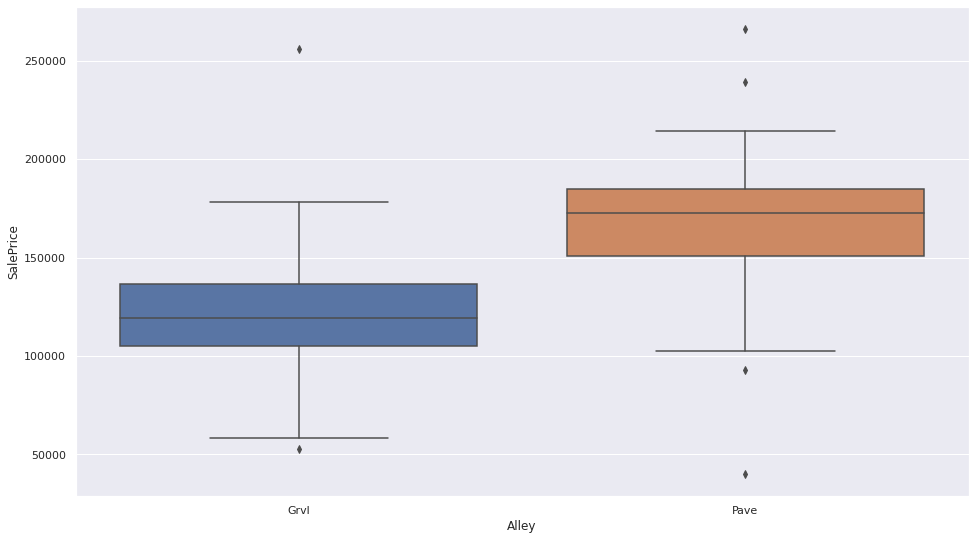

In [26]:
create_plot('Alley', 'boxplot')

#### LotShape

General shape of property:
- Reg:	Regular	
- IR1:	Slightly irregular
- IR2:	Moderately Irregular
- IR3:	Irregular 

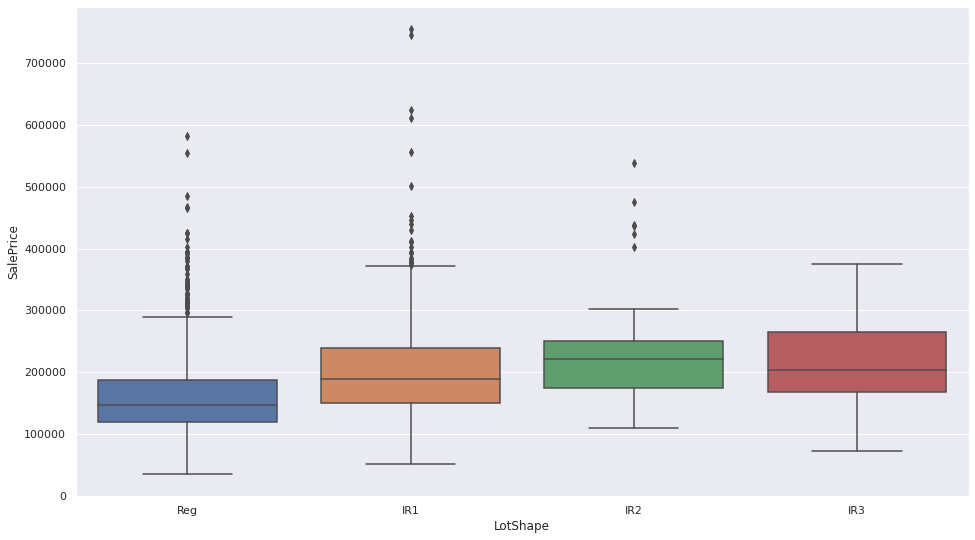

In [27]:
create_plot('LotShape', 'boxplot')

#### LandContour

Flatness of the property:
- Lvl:	Near Flat/Level	
- Bnk:	Banked - Quick and significant rise from street grade to building
- HLS:	Hillside - Significant slope from side to side
- Low:	Depression 

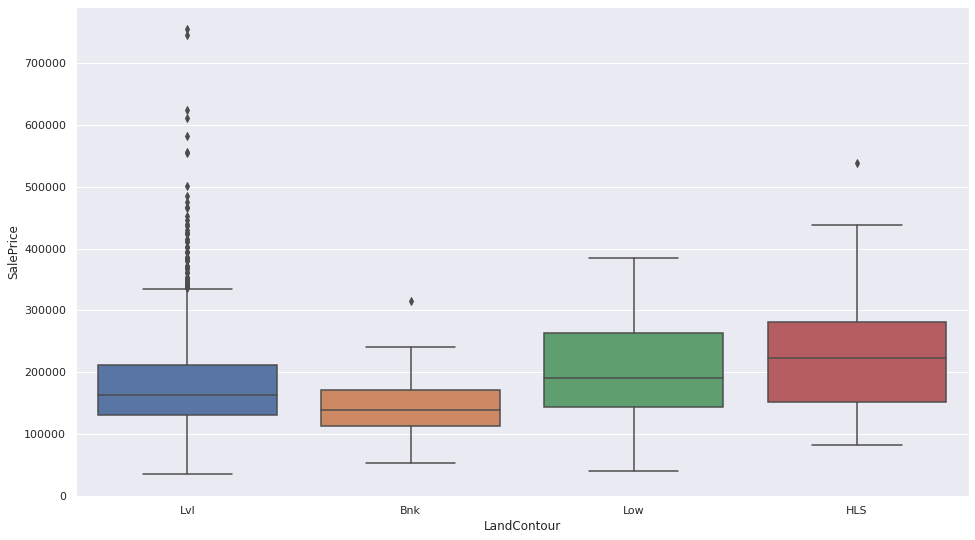

In [28]:
create_plot('LandContour', 'boxplot')